# Bank Dataset

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from vecstack import stacking
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv('C:/Users/Drago/iCloudDrive/Documents/Documents - Mike’s MacBook Pro/Python/Portfolio/beginner_datasets/bank.csv')

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
col = bank.columns
print(col)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [11]:
y = bank.default
x = bank.drop('default', axis=1)
no, yes = y.value_counts()
print('Number of No Default: ', no)
print('Number of Yes Default: ', yes)

Number of No Default:  44396
Number of Yes Default:  815


In [107]:
encoder = LabelEncoder()

In [109]:
y = encoder.fit_transform(y)

In [140]:
y = pd.DataFrame(y, columns=['default'])

## Data Visualization & Feature Selection

In [14]:
numeric_col = x.select_dtypes(include=np.number)
cat_col = x.select_dtypes(include=['object'])

In [15]:
numeric_col_name = numeric_col.columns
print(numeric_col_name)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [16]:
cat_col_name = cat_col.columns
print(cat_col_name)

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'deposit'],
      dtype='object')


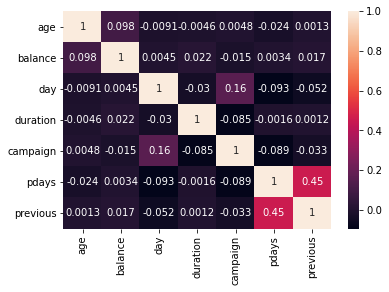

In [17]:
sns.heatmap(numeric_col.corr(), annot=True)

- No numerical variables have a high correlation value, so nothing will be dropped

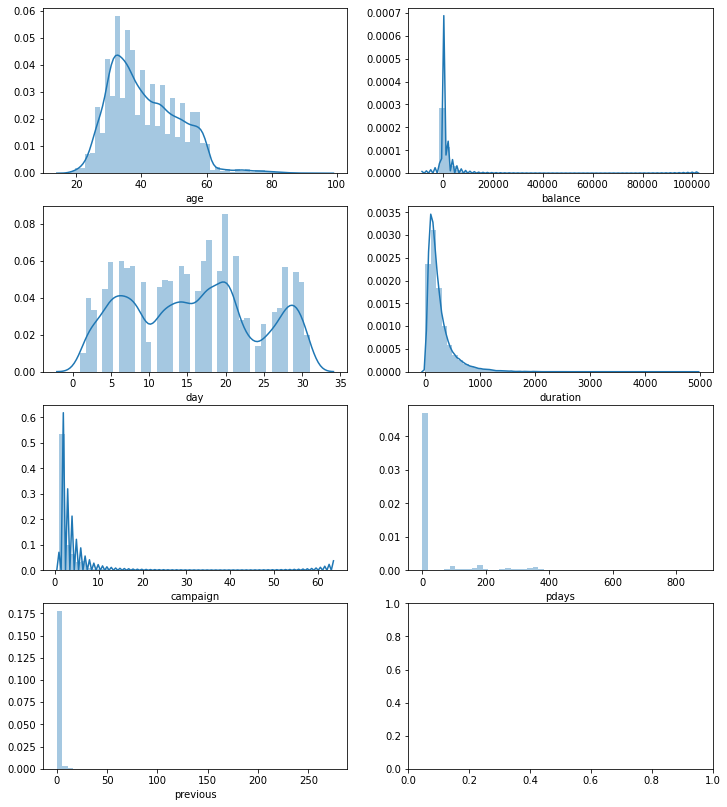

In [10]:
f, ax= plt.subplots(4,2, figsize=(12,14))
sns.distplot(numeric_col['age'],ax=ax[0,0])
sns.distplot(numeric_col['balance'],ax=ax[0, 1])
sns.distplot(numeric_col['day'],ax=ax[1,0])
sns.distplot(numeric_col['duration'],ax=ax[1,1])
sns.distplot(numeric_col['campaign'],ax=ax[2,0])
sns.distplot(numeric_col['pdays'],ax=ax[2,1])
sns.distplot(numeric_col['previous'],ax=ax[3,0])

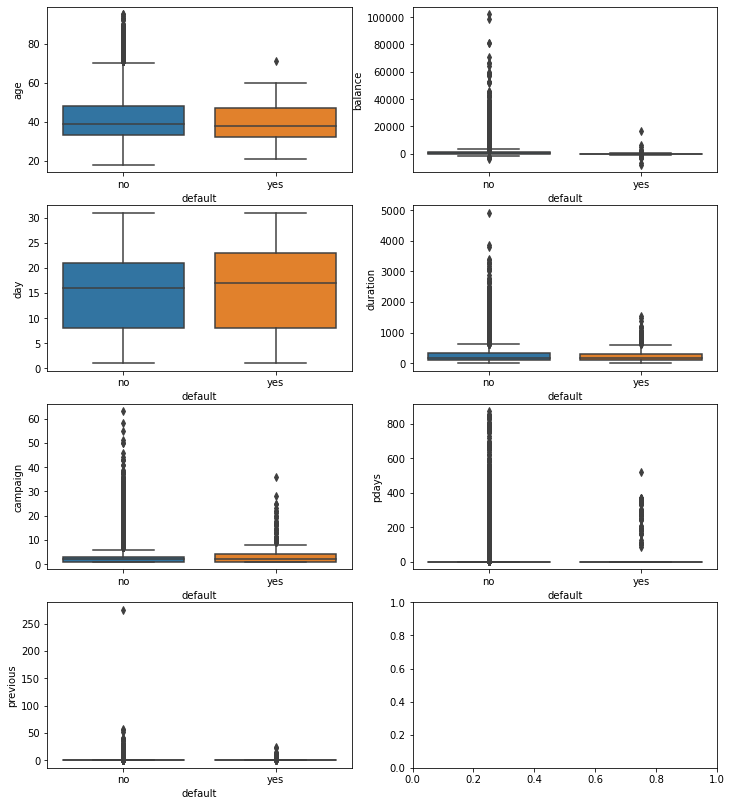

In [20]:
f, ax= plt.subplots(4,2, figsize=(12,14))
sns.boxplot(x='default',y='age', data=bank ,ax=ax[0,0])
sns.boxplot(x='default',y='balance', data=bank ,ax=ax[0, 1])
sns.boxplot(x='default',y='day', data=bank ,ax=ax[1,0])
sns.boxplot(x='default',y='duration', data=bank ,ax=ax[1,1])
sns.boxplot(x='default',y='campaign', data=bank ,ax=ax[2,0])
sns.boxplot(x='default',y='pdays', data=bank ,ax=ax[2,1])
sns.boxplot(x='default',y='previous', data=bank ,ax=ax[3,0])

## Pre-Processing

In [36]:
cat_dummy = pd.get_dummies(cat_col)

In [27]:
scaler = StandardScaler()

In [29]:
numeric_cols_scaled = scaler.fit_transform(numeric_col)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_col.columns)

In [47]:
scaled_df = pd.concat([numeric_cols_scaledDF, cat_dummy], axis=1)

In [49]:
scaled_df.drop(scaled_df.columns[33:45],axis=1,inplace=True)

In [143]:
df = pd.concat([y, scaled_df],axis=1)

## LR

In [144]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=10)

In [145]:
lr = LogisticRegression(class_weight='balanced',random_state=10)
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [146]:
lr_acc = accuracy_score(y_test, lr_pred)
print('LR Accuarcy score:', "{:.2%}".format(lr_acc))

LR Accuarcy score: 72.50%


In [147]:
cfm = confusion_matrix(y_test, lr_pred)
print(cfm)

[[6429 2453]
 [  34  127]]


In [148]:
target_names = ['no','yes']

In [149]:
print(classification_report(y_test,lr_pred, target_names = target_names))

              precision    recall  f1-score   support

          no       0.99      0.72      0.84      8882
         yes       0.05      0.79      0.09       161

    accuracy                           0.72      9043
   macro avg       0.52      0.76      0.47      9043
weighted avg       0.98      0.72      0.82      9043



## SVM

In [150]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
svm_linear_pred = svm_linear.predict(X_test)

In [151]:
svm_linear_acc = accuracy_score(y_test, svm_linear_pred)
print('SVM Linear:',"{:.3%}".format(svm_linear_acc))

SVM Linear: 98.220%


In [152]:
cfm_1 = confusion_matrix(y_test, svm_linear_pred)
print(cfm_1)

[[8882    0]
 [ 161    0]]


In [153]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
svm_rbf_predict = svm_rbf.predict(X_test)

In [154]:
svm_rbf_acc = accuracy_score(y_test, svm_rbf_predict)
print('SVM RBF:',"{:.3%}".format(svm_rbf_acc))

SVM RBF: 98.220%


## Ensemble

In [122]:
stacked_models = [BaggingClassifier(n_estimators=25, random_state=10), AdaBoostClassifier(n_estimators=25, random_state=10)]

In [123]:
stack_train, stack_test = stacking(stacked_models, X_train, y_train, X_test, regression=False,
                                  mode='oof_pred_bag', metric=accuracy_score, n_folds=5, stratified=True,
                                  shuffle=True,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [BaggingClassifier]
    fold  0:  [0.98078518]
    fold  1:  [0.98009400]
    fold  2:  [0.98064694]
    fold  3:  [0.98078252]
    fold  4:  [0.98119729]
    ----
    MEAN:     [0.98070119] + [0.00035536]
    FULL:     [0.98070117]

model  1:     [AdaBoostClassifier]
    fold  0:  [0.98161460]
    fold  1:  [0.98161460]
    fold  2:  [0.98119989]
    fold  3:  [0.98188857]
    fold  4:  [0.98133555]
    ----
    MEAN:     [0.98153064] + [0.00024069]
    FULL:     [0.98153063]



In [125]:
final_model = XGBClassifier(n_estimators=10, max_depth=3, n_jobs=-1, learning_rate=0.1, random_state=10)

In [126]:
final_model_fit = final_model.fit(stack_train, y_train)

In [127]:
stacked_pred = final_model.predict(stack_test)

In [131]:
ensemble_accu = accuracy_score(y_test, stacked_pred)

In [136]:
cfm_3 = confusion_matrix(y_test, stacked_pred)
print(cfm_3)

[[8882    0]
 [ 161    0]]


In [137]:
print(classification_report(y_test,stacked_pred, target_names = target_names))

              precision    recall  f1-score   support

          no       0.98      1.00      0.99      8882
         yes       0.00      0.00      0.00       161

    accuracy                           0.98      9043
   macro avg       0.49      0.50      0.50      9043
weighted avg       0.96      0.98      0.97      9043



In [134]:
print('Final prediction score:', "{:.3%}".format(ensemble_accu))

Final prediction score: 98.220%


- SVM (linear, rbf) & ensemble methods are very bad at prediciting positive class, therefore resampling techniques will be used to improve the preidction on the positive class

## Resampling

### Random Oversampling

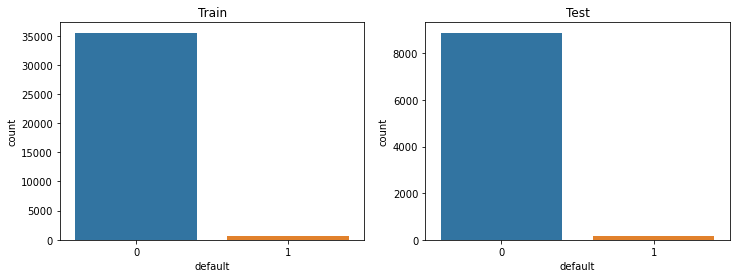

In [176]:
f, ax = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x='default', data=pd.DataFrame(y_train), ax=ax[0])
sns.countplot(x='default', data=pd.DataFrame(y_test), ax=ax[1])
ax[0].title.set_text('Train')
ax[1].title.set_text('Test')

In [179]:
ros = RandomOverSampler(sampling_strategy='minority', random_state=10)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

In [182]:
y_train_ros.default.value_counts()

1    35514
0    35514
Name: default, dtype: int64

## Correlation of the oversampled datasets

In [211]:
ov_df = pd.concat([X_train_ros, y_train_ros],axis=1)

In [219]:
train_df = pd.concat([X_train, y_train],axis=1)

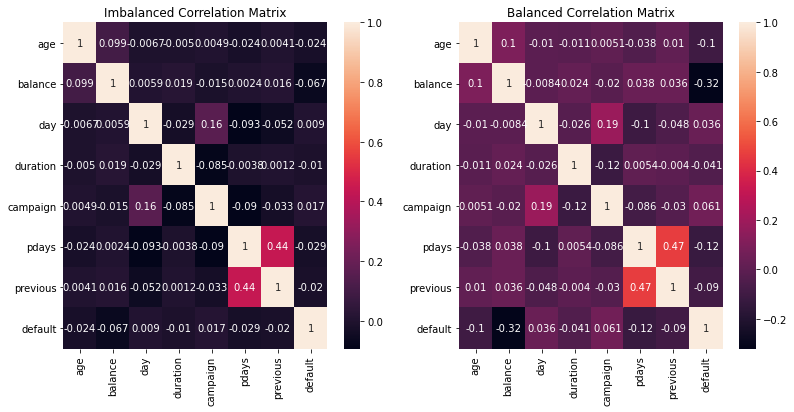

In [221]:
f, ax = plt.subplots(1,2, figsize=(13,6))
sns.heatmap(train_df.select_dtypes(include=['float64','int32']).corr(), annot=True, ax=ax[0])
ax[0].title.set_text('Imbalanced Correlation Matrix')
sns.heatmap(ov_df.select_dtypes(include=['float64','int32']).corr(), annot=True, ax=ax[1])
ax[1].title.set_text('Balanced Correlation Matrix')

- In the balacned subsample, negative correlation value of 'balance' will likely to go on default, but the negative value is not so high.

Text(0.5, 1.0, 'Balance VS Class Negative Correlation')

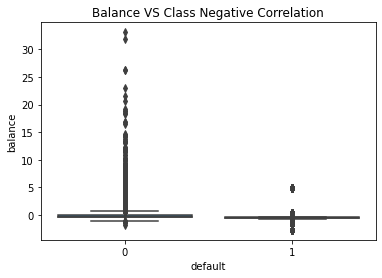

In [224]:
sns.boxplot(x='default', y='balance', data=ov_df)
plt.title('Balance VS Class Negative Correlation')

## LR with Oversampling training sets

In [190]:
ov_lr = LogisticRegression(class_weight='balacned', random_state=10)
ov_lr.fit(X_train_ros, y_train_ros)
ov_lr_pred = ov_lr.predict(X_test)

In [191]:
cfm_4 = confusion_matrix(y_test, ov_lr_pred)
print(cfm_4)

[[6424 2458]
 [  35  126]]


In [192]:
print(classification_report(y_test, ov_lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.84      8882
           1       0.05      0.78      0.09       161

    accuracy                           0.72      9043
   macro avg       0.52      0.75      0.46      9043
weighted avg       0.98      0.72      0.82      9043



## SVM with Oversampling

In [194]:
ov_svm_linear = SVC(kernel='linear').fit(X_train_ros,y_train_ros)
ov_svm_linear_pred = ov_svm_linear.predict(X_test)

In [195]:
cfm_5 = confusion_matrix(y_test, ov_svm_linear_pred )
print(cfm_5)

[[6206 2676]
 [  28  133]]


In [196]:
print(classification_report(y_test, ov_svm_linear_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82      8882
           1       0.05      0.83      0.09       161

    accuracy                           0.70      9043
   macro avg       0.52      0.76      0.46      9043
weighted avg       0.98      0.70      0.81      9043



In [197]:
ov_svm_rbf = SVC(kernel='rbf').fit(X_train_ros,y_train_ros)
ov_svm_rbf_pred = ov_svm_rbf.predict(X_test)

In [198]:
cfm_6 = confusion_matrix(y_test, ov_svm_rbf_pred)
print(cfm_6)

[[7301 1581]
 [  75   86]]


In [199]:
print(classification_report(y_test, ov_svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8882
           1       0.05      0.53      0.09       161

    accuracy                           0.82      9043
   macro avg       0.52      0.68      0.50      9043
weighted avg       0.97      0.82      0.88      9043



- Oversampling did not improve accuracy score and recall for the positive class